In [1]:
# setup environment 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import sklearn
import scipy
import seaborn as sns

print("Done")

Done


In [4]:
file_path = 'datasets/cardio_train.csv'
data = pd.read_csv(file_path, sep=';')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
data.gender.unique()

array([2, 1], dtype=int64)

In [8]:
data.age.min()

10798

In [9]:
data.age.max()

23713

In [10]:
# Convert the age to years 

In [12]:
data['age'] = round(data.age/365, 0).astype(int)

In [14]:
data.age.min()

30

In [15]:
data.age.max()

65

In [17]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0


<AxesSubplot:title={'center':'Age Distribution in Years'}, ylabel='Frequency'>

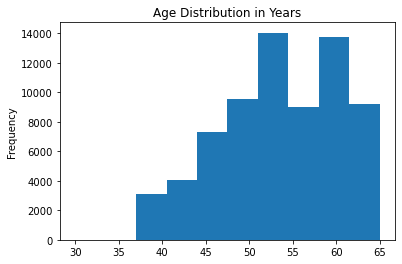

In [18]:
# histogram
data.age.plot(kind='hist', title='Age Distribution in Years')

# Pandas cut()
The syntax for pandas cut is 
pd.cut(df.column, num_bins)

In [19]:
cardio = pd.cut(data.age, 4)

In [21]:
cardio 
# This returns a series of categorical objects that provide buckets 
# we can use to split our data  

0        (47.5, 56.25]
1        (47.5, 56.25]
2        (47.5, 56.25]
3        (47.5, 56.25]
4        (47.5, 56.25]
             ...      
69995    (47.5, 56.25]
69996    (56.25, 65.0]
69997    (47.5, 56.25]
69998    (56.25, 65.0]
69999    (47.5, 56.25]
Name: age, Length: 70000, dtype: category
Categories (4, interval[float64]): [(29.965, 38.75] < (38.75, 47.5] < (47.5, 56.25] < (56.25, 65.0]]

In [22]:
# Creating custom bins 
bins = [30,40,50,60,70]

In [23]:
cardio2 = pd.cut(data.age, bins)

In [24]:
cardio2

0        (40, 50]
1        (50, 60]
2        (50, 60]
3        (40, 50]
4        (40, 50]
           ...   
69995    (50, 60]
69996    (60, 70]
69997    (50, 60]
69998    (60, 70]
69999    (50, 60]
Name: age, Length: 70000, dtype: category
Categories (4, interval[int64]): [(30, 40] < (40, 50] < (50, 60] < (60, 70]]

In [32]:
bins = list(range(30, 80, 10))

In [33]:
bins

[30, 40, 50, 60, 70]

## Adding labels 

We can also add labels that let us easily group and filter our data using our newly created bins 

We just need to add one moree argument to the cut function, that contains n-1 as many labels as we have bins 


In [37]:
# data["age_cat"] = pd.cut(data.age, bins=bins, labels=["Toddler","Teenager","Youth","Adult"])

data["age_cat"] = pd.cut(data.age, bins=bins, labels=["30-40","40-50","50-60","60-70"])

In [38]:
data.head(20)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_cat
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,40-50
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,50-60
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1,50-60
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,40-50
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0,40-50
5,8,60,1,151,67.0,120,80,2,2,0,0,0,0,50-60
6,9,61,1,157,93.0,130,80,3,1,0,0,1,0,60-70
7,12,62,2,178,95.0,130,90,3,3,0,0,1,1,60-70
8,13,48,1,158,71.0,110,70,1,1,0,0,1,0,40-50
9,14,54,1,164,68.0,110,60,1,1,0,0,0,0,50-60


## Combining Data with Pandas merge(), join(), and concat()

In [39]:
# merge() for combining data on common columns or indices
# join() for combining data on a key column or an index
# concat() for combining DataFrames across rows or columns 

In [40]:
file_path = 'datasets/zoo.csv'
zoo = pd.read_csv(file_path)

In [44]:
zoo_eats = pd.read_csv('datasets/zoo_eats.csv', sep=";")

In [49]:
zoo.water_need.max()

600

In [50]:
zoo.columns

Index(['animal', 'uniq_id', 'water_need'], dtype='object')

In [52]:
zoo.sort_values('water_need', ascending=True).head()

,animal,uniq_id,water_need
14,zebra,1015,80
13,zebra,1014,100
8,zebra,1009,200
9,zebra,1010,220
12,zebra,1013,220


In [54]:
zoo_eats

,animal,food
0,elephant,vegetables
1,tiger,meat
2,kangaroo,vegetables
3,zebra,vegetables
4,giraffe,vegetables


In [57]:
# merging
zoo.merge(zoo_eats)

,animal,uniq_id,water_need,food
0,elephant,1001,500,vegetables
1,elephant,1002,600,vegetables
2,elephant,1003,550,vegetables
3,tiger,1004,300,meat
4,tiger,1005,320,meat
5,tiger,1006,330,meat
6,tiger,1007,290,meat
7,tiger,1008,310,meat
8,zebra,1009,200,vegetables
9,zebra,1010,220,vegetables


In [58]:
zoo.merge(zoo_eats, how='left')

,animal,uniq_id,water_need,food
0,elephant,1001,500,vegetables
1,elephant,1002,600,vegetables
2,elephant,1003,550,vegetables
3,tiger,1004,300,meat
4,tiger,1005,320,meat
5,tiger,1006,330,meat
6,tiger,1007,290,meat
7,tiger,1008,310,meat
8,zebra,1009,200,vegetables
9,zebra,1010,220,vegetables


In [59]:
zoo.merge(zoo_eats, how='right')

,animal,uniq_id,water_need,food
0,elephant,1001.0,500.0,vegetables
1,elephant,1002.0,600.0,vegetables
2,elephant,1003.0,550.0,vegetables
3,tiger,1004.0,300.0,meat
4,tiger,1005.0,320.0,meat
5,tiger,1006.0,330.0,meat
6,tiger,1007.0,290.0,meat
7,tiger,1008.0,310.0,meat
8,kangaroo,1020.0,410.0,vegetables
9,kangaroo,1021.0,430.0,vegetables
